In [1]:
import os
import pandas as pd

# Set pandas options to display all rows
pd.set_option('display.max_rows', 220)

/home/mke37/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
L = [] #word
N = [] #label

with open("../../../Dataset/TrainingG_Data.txt", 'r', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        if line.strip():  # Check if the line is not empty
            parts = line.split()
            if len(parts) == 2:  # Ensure the line contains exactly two parts
                label, word = parts
                L.append(word)
                N.append(label)


In [3]:
series = pd.Series(N)

counts = series.value_counts()
r=counts[:171]
all_labels = r.index.tolist()

# Now you have the values where the count is between 30-40
print(len(all_labels))
# counts

171


In [4]:
len(counts)

212

In [5]:
# EXTRACTING SENTENCES IN A CORPUS AND ITS LABELS FOR EACH WORDS
S=[] #sentence
L=[] #words
N=[] #labels for each words
M=[] #label
with open("../../../Dataset/TrainingG_Data.txt", 'r',encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        if line.strip():
            label,word = line.split()
            L.append(word)
            N.append(label)
            if word == '.':
                S.append(L)
                M.append(N)
                L=[]
                N=[]


In [6]:
# S[0]

In [7]:
import random
from collections import defaultdict
target_labels=all_labels

def create_support_sets(sentences, labels,target_labels, seed=None):
    if seed is not None:
        random.seed(seed)  # Set the seed for the random number generator

    support_set = []
    support_set_labels=[]
    label_count_support = defaultdict(int)

    for sentence, word_labels in zip(sentences, labels):
        for label in word_labels:
            if label in target_labels:
                if label_count_support[label] < 20:
                    if random.random() < 0.5:  
                        if label_count_support[label] < 20:
                            support_set.append(sentence)
                            support_set_labels.append(word_labels)
                            label_count_support[label] += 1

    return label_count_support,support_set,support_set_labels




In [8]:
seed_value = 42  # Choose any integer as the seed value
support_set_count,support_set,support_set_labels = create_support_sets(S,M,all_labels ,seed=seed_value)

In [9]:
print(len(support_set_count))
print(len(support_set))
print(len(support_set_labels))

171
3326
3326


In [10]:
#Making Query set    

# EXTRACTING SENTENCES IN A CORPUS AND ITS LABELS FOR EACH WORDS
S=[] #sentence
L=[] #words
N=[] #labels for each words
M=[] #label
with open("../../../Dataset/TestingData.txt", 'r',encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        if line.strip():
            label,word = line.split()
            L.append(word)
            N.append(label)
            if word == '.':
                S.append(L)
                M.append(N)
                L=[]
                N=[]



In [11]:
target_labels=all_labels
def create_query_sets(sentences, labels,target_labels, seed=None):
    if seed is not None:
        random.seed(seed)  # Set the seed for the random number generator

    query_set = []
    query_set_labels=[]
    label_count_query = defaultdict(int)

    for sentence, word_labels in zip(sentences, labels):
        for label in word_labels:
            if label in target_labels:
                    if random.random() < 0.5:  
                        if label_count_query[label] < 5:
                            query_set.append(sentence)
                            query_set_labels.append(word_labels)
                            label_count_query[label] += 1

    return label_count_query,query_set,query_set_labels



In [12]:
seed_value = 42  # Choose any integer as the seed value
query_set_count,query_set,query_set_labels = create_query_sets(S,M,all_labels ,seed=seed_value)

In [13]:
seed_value = 42  # Choose any integer as the seed value
print(len(support_set_count))
print(len(query_set_count))
print(len(support_set))
print(len(query_set))
print(len(support_set_labels))
print(len(query_set_labels))

171
122
3326
439
3326
439


In [14]:
# support_set_count

In [15]:
# query_set_count

In [16]:
#extracting unique sentences 
from collections import OrderedDict


unique_lists = OrderedDict((tuple(inner_list), None) for inner_list in support_set)

final_support_set = list(unique_lists.keys())
len(final_support_set)

1713

In [17]:
#extracting labels corresonds to unique sentences
sentence_index_map = {tuple(sentence): index for index, sentence in enumerate(support_set)}

final_support_set_labels = []

for sentence in final_support_set:
    index_in_support_set = sentence_index_map[tuple(sentence)]

    labels_for_sentence = support_set_labels[index_in_support_set]

    final_support_set_labels.append(labels_for_sentence)
len(final_support_set_labels)

1713

In [18]:
# extracting unique sentences in query set
from collections import OrderedDict


unique_lists = OrderedDict((tuple(inner_list), None) for inner_list in query_set)

final_query_set = list(unique_lists.keys())

len(final_query_set)

222

In [19]:
sentence_index_map = {tuple(sentence): index for index, sentence in enumerate(query_set)}

final_query_set_labels = []

for sentence in final_query_set:
    index_in_query_set = sentence_index_map[tuple(sentence)]

    labels_for_sentence = query_set_labels[index_in_query_set]

    final_query_set_labels.append(labels_for_sentence)
len(final_query_set_labels)

222

In [20]:
support_set=final_support_set
query_set=final_query_set
support_set_labels=final_support_set_labels
query_set_labels=final_query_set_labels

In [21]:
# support_set

In [22]:
# support_set_labels

In [23]:
import torch
from transformers import AutoTokenizer, AutoModel

In [24]:
# Initialize the AraBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('aubmindlab/bert-base-arabertv01')
model = AutoModel.from_pretrained('aubmindlab/bert-base-arabertv01')

In [25]:
def extract_features(sentence):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, is_split_into_words=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.squeeze(0), inputs.word_ids()  # (sequence_length, hidden_size), word_ids

In [26]:
# Initialize empty lists to store the data
data = []

# Iterate through the support set and extract features
for sentence, labels in zip(support_set, support_set_labels):
    features, word_ids = extract_features(sentence)

    # Map features to words and labels
    for i, word_id in enumerate(word_ids):
        if word_id is not None:
            word = sentence[word_id]
            label = labels[word_id]
            feature_vector = features[i].numpy()
            data.append([*feature_vector, label])

# Create a DataFrame
feature_df_s = pd.DataFrame(data)

# Rename the last column to 'label'
feature_df_s.rename(columns={feature_df_s.columns[-1]: 'label'}, inplace=True)

In [27]:
# feature_df_s

In [28]:
# feature_df_s['label'].value_counts()

In [29]:
import numpy as np

labels = np.array(feature_df_s['label'])

specific_labels =all_labels
labels_filtered = np.where(np.isin(labels, specific_labels), labels, 'OUTSIDE')


In [30]:
# LABEL ENCODING 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

feature_df_s['label']= label_encoder.fit_transform(labels_filtered)

x=feature_df_s.drop(columns=['label'])
# feature_df_s

In [31]:
import pickle
# Save the label encoder
with open('label_G_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [32]:
mapping={}
classes = label_encoder.classes_
labels = label_encoder.transform(classes)

# Create dictionary mapping
mapping = dict(zip(classes, labels))

# print(mapping)

In [33]:
# Initialize empty lists to store the data
data = []

# Iterate through the support set and extract features
for sentence, labels in zip(query_set, query_set_labels):
    features, word_ids = extract_features(sentence)

    # Map features to words and labels
    for i, word_id in enumerate(word_ids):
        if word_id is not None:
            word = sentence[word_id]
            label = labels[word_id]
            feature_vector = features[i].numpy()
            data.append([*feature_vector, label])

# Create a DataFrame
feature_df_q = pd.DataFrame(data)

# Rename the last column to 'label'
feature_df_q.rename(columns={feature_df_q.columns[-1]: 'label'}, inplace=True)

In [34]:
# feature_df_q

In [35]:
labels = np.array(feature_df_q['label'])

# labels that we consisdered
specific_labels =all_labels

labels_filtered = np.where(np.isin(labels, specific_labels), labels, 'OUTSIDE')

feature_df_q['label']= label_encoder.transform(labels_filtered)

x_test=feature_df_q.drop(columns=['label'])
# feature_df_q

# Prototype Generation

In [36]:
#PROTOTYPE GENERATION BY TAKING MEAN
means_by_class = feature_df_s.groupby('label').mean()

means_by_class

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
label,,,,,,,,,,,,,,,,,,,,,
0,0.330257,-0.260550,-0.018024,-0.082837,-0.030207,-0.281764,0.139520,-0.088033,0.250404,-0.610227,...,-0.011918,0.036374,0.612022,-0.369463,-0.105619,-0.222049,0.747685,0.678957,0.342044,0.010552
1,-0.119722,-0.446325,0.022302,0.087246,-0.159949,0.576837,-0.073106,0.383371,-0.105879,-0.289891,...,0.281798,0.189625,0.168328,-0.510630,0.252716,0.055363,0.873268,0.226839,0.202640,0.017938
2,-0.251144,-0.021817,0.436397,0.404194,-0.718742,0.594736,-0.392867,0.554724,-1.034230,-0.446489,...,0.384682,-0.311290,1.538821,-0.668552,0.218559,0.125901,0.735520,-0.210450,0.429667,0.728380
3,0.406562,-0.078020,-0.164712,0.013041,-0.146740,0.109168,-0.160850,-0.258089,0.132617,-0.552004,...,0.357194,-0.292051,0.758154,-0.054312,-0.325212,0.150286,0.231618,0.659292,0.081045,-0.094435
4,0.405680,-0.310477,0.184436,-0.355307,-0.531129,0.174745,-0.064682,-0.231558,0.325986,-0.825698,...,0.032006,0.082918,0.566246,-0.289101,-0.012753,-0.454477,0.709164,0.522927,0.301637,-0.046769
5,0.186209,-0.225090,0.095873,-0.075171,-0.230275,0.102135,-0.074263,0.006465,0.255539,-0.562656,...,0.029591,-0.229065,0.502885,-0.598507,0.107226,-0.161780,0.586108,0.554033,0.444893,0.280784
6,-0.223199,-0.022577,-0.231548,0.647971,-0.719543,-0.148219,-0.358201,0.398474,-0.188194,-0.467127,...,0.335134,-0.271084,0.414225,-0.554756,-0.178431,-0.342030,0.222791,-0.129184,0.563338,0.330649
7,0.087905,-0.169216,0.523568,0.150279,-0.982236,-0.092913,-0.067549,-0.211276,-0.100048,-0.509247,...,-0.004601,0.106115,0.528876,0.017017,-0.107949,-0.158240,0.404715,0.660995,0.341293,0.212996
8,0.312177,-0.268117,0.203728,0.269582,-0.183573,0.246053,0.548354,0.752391,0.029591,-0.506389,...,0.730941,-0.481339,0.179969,-0.434604,-0.184407,-0.191981,0.094409,0.008347,0.332026,0.267679


In [37]:
# Save DataFrame to CSV
means_by_class.to_csv('means_G_by_class.csv')

In [38]:
def euclidean_distance(feature_vector, centroid):
    return np.linalg.norm(feature_vector - centroid)
distances_df = pd.DataFrame()

for i,centroid in means_by_class.iterrows():
    dist=[]
    for j,feature in x_test.iterrows():
        distance= np.linalg.norm(feature - centroid) 
        dist.append(distance)
    distances_df[i]=dist

/tmp/ipykernel_6566/1549879276.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[i]=dist
/tmp/ipykernel_6566/1549879276.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df[i]=dist
/tmp/ipykernel_6566/1549879276.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distanc

In [39]:
distances_df['predictions']=distances_df.idxmin(axis=1)
distances_df['actual_label']=feature_df_q['label']
# distances_df

/tmp/ipykernel_6566/1804366510.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df['predictions']=distances_df.idxmin(axis=1)
/tmp/ipykernel_6566/1804366510.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  distances_df['actual_label']=feature_df_q['label']


In [40]:
#evaluation using prototypical network
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy = accuracy_score(distances_df['actual_label'],distances_df['predictions'])

print("Accuracy Score:", accuracy)

conf_matrix = confusion_matrix(distances_df['actual_label'],distances_df['predictions'])

print('confusion matrix')
print(conf_matrix)

classes = label_encoder.classes_
labels = label_encoder.transform(classes)

Accuracy Score: 0.5828586224754013
confusion matrix
[[   0    0    0 ...    0    1    0]
 [   0   11    0 ...    0    0    0]
 [   0    0    4 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    3    0]
 [   7   20    0 ...    0  105 3396]]


In [41]:
conf_matrix.shape

(158, 158)

In [42]:
from sklearn.metrics import classification_report
classification_report=classification_report(distances_df['actual_label'],distances_df['predictions'])
print(classification_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.31      0.55      0.40        20
           2       1.00      1.00      1.00         4
           3       0.37      0.84      0.52        44
           4       0.06      0.18      0.10        11
           5       0.00      0.00      0.00         0
           6       0.11      0.40      0.17         5
           7       0.00      0.00      0.00        20
           8       0.35      1.00      0.52         8
           9       0.31      0.40      0.35        45
          10       0.50      0.65      0.57        23
          11       0.55      0.49      0.52        35
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.28      0.51      0.36        78
          16       0.52      0.33      0.41        69
          18       0.30    

/home/mke37/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mke37/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mke37/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mke37/.local/lib/python3.10/site-packages/

In [43]:
# Assuming distances_df is your DataFrame with 'actual_label' and 'predictions' columns
y_true = distances_df['actual_label']
y_pred = distances_df['predictions']

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Aggregate TP, FP, FN
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP

# Calculate Micro F1 Score
micro_F1_score = 2 * TP.sum() / ((2 * TP.sum()) + FP.sum() + FN.sum())

print("Micro F1 Score:", micro_F1_score)

Confusion Matrix:
 [[   0    0    0 ...    0    1    0]
 [   0   11    0 ...    0    0    0]
 [   0    0    4 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    3    0]
 [   7   20    0 ...    0  105 3396]]
Micro F1 Score: 0.5828586224754013


In [44]:
report_lines = classification_report.strip().split('\n')
class_names = [line.split()[0] for line in report_lines[2:-5]]  # Extract class names
f1_scores = [float(line.split()[3]) for line in report_lines[2:-5]]  # Extract F1 scores

# Calculate the average F1 score
average_f1_score = sum(f1_scores) / len(f1_scores)

print("Average F1 Score:", average_f1_score)

Average F1 Score: 0.26000000000000006


In [45]:
# f1_scores

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

2024-08-24 23:06:44.174268: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 23:06:44.174323: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 23:06:44.175475: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-24 23:06:44.184468: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-24 23:06:47.141146: W tensorflow/compiler/tf2

In [47]:
#ANN model
model1 = Sequential([
    Dense(128, input_dim=768, activation='relu'), 
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'), 
    BatchNormalization(),
    Dropout(0.4),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(212, activation='softmax'),
])

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model1.fit(
    x, feature_df_s['label'], 
    epochs=50, batch_size=32, 
    validation_data=(x_test, feature_df_q['label']),
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model1.evaluate(x, feature_df_s['label'])
print("Training Loss:", loss)
print(" training Accuracy:", accuracy)

loss, accuracy = model1.evaluate(x_test, feature_df_q['label'])
print("Testing Loss:", loss)
print(" testing Accuracy:", accuracy)

2024-08-24 23:06:50.812757: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-24 23:06:50.813198: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-24 23:06:50.813766: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required l

Epoch 1/50
2041/2041 [==============================] - 10s 4ms/step - loss: 1.7236 - accuracy: 0.7377 - val_loss: 1.3547 - val_accuracy: 0.7557
Epoch 2/50
2041/2041 [==============================] - 8s 4ms/step - loss: 1.1246 - accuracy: 0.7923 - val_loss: 1.1385 - val_accuracy: 0.7758
Epoch 3/50
2041/2041 [==============================] - 8s 4ms/step - loss: 0.9897 - accuracy: 0.7989 - val_loss: 1.0547 - val_accuracy: 0.7806
Epoch 4/50
2041/2041 [==============================] - 8s 4ms/step - loss: 0.9021 - accuracy: 0.8038 - val_loss: 0.9599 - val_accuracy: 0.7897
Epoch 5/50
2041/2041 [==============================] - 8s 4ms/step - loss: 0.8472 - accuracy: 0.8060 - val_loss: 0.9163 - val_accuracy: 0.7922
Epoch 6/50
2041/2041 [==============================] - 8s 4ms/step - loss: 0.7985 - accuracy: 0.8105 - val_loss: 0.8876 - val_accuracy: 0.7983
Epoch 7/50
2041/2041 [==============================] - 8s 4ms/step - loss: 0.7626 - accuracy: 0.8138 - val_loss: 0.8816 - val_accuracy

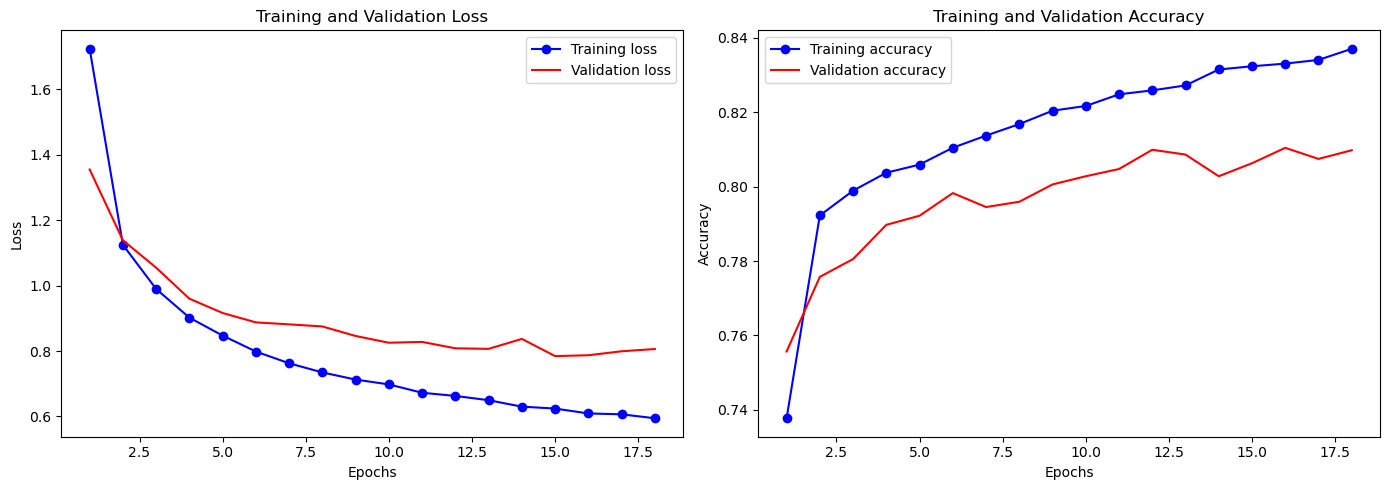

In [48]:
import matplotlib.pyplot as plt
# Extract metrics from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot Training & Validation Loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [49]:
from tensorflow.keras.models import load_model, save_model
# Save model weights to HDF5
# Save the model in HDF5 format
model1.save('ANN_G.h5')

/home/mke37/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
# evaluation using ANN model
from sklearn.metrics import confusion_matrix, accuracy_score

predictions = model1.predict(x_test)
true_labels = feature_df_q['label']
# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions.argmax(axis=1))
# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions.argmax(axis=1))
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)



242/242 [==============================] - 1s 2ms/step
Confusion Matrix:
[[   0    0    0 ...    0    0    2]
 [   0    9    0 ...    0    0    6]
 [   0    0    4 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    0   23]
 [   1    2    0 ...    0    1 5507]]
Accuracy: 0.8063179699637494


In [51]:
from sklearn.metrics import classification_report
classification_report=classification_report(true_labels, predictions.argmax(axis=1))
print(classification_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.56      0.45      0.50        20
           2       1.00      1.00      1.00         4
           3       0.95      0.43      0.59        44
           4       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         5
           7       0.31      0.20      0.24        20
           8       0.83      0.62      0.71         8
           9       0.00      0.00      0.00        45
          10       0.79      0.48      0.59        23
          11       0.75      0.09      0.15        35
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.52      0.35      0.42        78
          16       0.59      0.23      0.33        69
          18       0.75      0.86      0.80         7
          19       0.38      0.19      0.25        27
          20       0.35    

/home/mke37/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mke37/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mke37/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mke37/.local/lib/python3.10/site-packages/

In [52]:
# Assuming distances_df is your DataFrame with 'actual_label' and 'predictions' columns
y_true = feature_df_q['label']
y_pred = predictions.argmax(axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# Aggregate TP, FP, FN
TP = np.diag(cm)
FP = cm.sum(axis=0) - TP
FN = cm.sum(axis=1) - TP

# Calculate Micro F1 Score
micro_F1_score = 2 * TP.sum() / ((2 * TP.sum()) + FP.sum() + FN.sum())

print("Micro F1 Score:", micro_F1_score)

Confusion Matrix:
 [[   0    0    0 ...    0    0    2]
 [   0    9    0 ...    0    0    6]
 [   0    0    4 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    0   23]
 [   1    2    0 ...    0    1 5507]]
Micro F1 Score: 0.8063179699637494


In [53]:
report_lines = classification_report.strip().split('\n')
class_names = [line.split()[0] for line in report_lines[2:-5]]  # Extract class names
f1_scores = [float(line.split()[3]) for line in report_lines[2:-5]]  # Extract F1 scores

# Calculate the average F1 score
average_f1_score = sum(f1_scores) / len(f1_scores)

print("Average F1 Score:", average_f1_score)

Average F1 Score: 0.23669064748201443


In [54]:
# f1_scores

# Script for testing 

In [55]:
import torch
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from tensorflow.keras.models import load_model
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from camel_tools.tokenizers.word import simple_word_tokenize

In [56]:
# Load the label encoder
with open('label_G_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

In [57]:
# Load AraBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('aubmindlab/bert-base-arabertv01')
model = AutoModel.from_pretrained('aubmindlab/bert-base-arabertv01')

In [58]:
def extract_features(sentence):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, is_split_into_words=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.squeeze(0), inputs.word_ids()  # (sequence_length, hidden_size), word_ids

## **prediction using ANN model**

In [59]:
from tensorflow.keras.models import load_model
classification_model = load_model('model.h5')

In [60]:
def classify_word(sentence):
    
    sentence = simple_word_tokenize(sentence)
    
    features, word_ids = extract_features(sentence)
    
    data = []
    words = []
    seen_word_ids = set()
    
    # Map features to words and labels
    for i, word_id in enumerate(word_ids):
        if word_id is not None and word_id not in seen_word_ids:
            seen_word_ids.add(word_id)
            words.append(sentence[word_id])
            feature_vector = features[i].numpy()
            data.append([*feature_vector])

    # Create a DataFrame
    feature_df = pd.DataFrame(data)
    
    # Classify using the pretrained model
    predictions = classification_model.predict(feature_df)
    # Get the predicted label indices
    predicted_label_indices = np.argmax(predictions, axis=1)
    # Transform the label indices to the actual labels
    predicted_labels = label_encoder.inverse_transform(predicted_label_indices)

    for word, label in zip(words, predicted_labels):
        print(f"Prediction for {word} -----------> {label}")

In [61]:
Arabic_sentence = "ثنائي أكسيد الكربون أو كما يعرف بالاسم الشائع ثاني أكسيد الكربون هو مركب كيميائي من  الأكسجين الكربون له الصيغة الكيميائية 2."
classify_word(Arabic_sentence)

1/1 [==============================] - 0s 116ms/step
Prediction for ثنائي -----------> I-Chemical_Thing
Prediction for أكسيد -----------> I-Chemical_Thing
Prediction for الكربون -----------> I-Chemical_Thing
Prediction for أو -----------> OUTSIDE
Prediction for كما -----------> OUTSIDE
Prediction for يعرف -----------> OUTSIDE
Prediction for بالاسم -----------> OUTSIDE
Prediction for الشائع -----------> OUTSIDE
Prediction for ثاني -----------> B-Chemical_Thing
Prediction for أكسيد -----------> I-Chemical_Thing
Prediction for الكربون -----------> I-Chemical_Thing
Prediction for هو -----------> OUTSIDE
Prediction for مركب -----------> OUTSIDE
Prediction for كيميائي -----------> OUTSIDE
Prediction for من -----------> OUTSIDE
Prediction for الأكسجين -----------> B-Chemical_Thing
Prediction for الكربون -----------> I-Chemical_Thing
Prediction for له -----------> OUTSIDE
Prediction for الصيغة -----------> OUTSIDE
Prediction for الكيميائية -----------> OUTSIDE
Prediction for 2 -----------> OUT

In [62]:
def classify_word(sentence):
    
    features, word_ids = extract_features(sentence)
    
    data = []
    words = []
    seen_word_ids = set()
    
    # Map features to words and labels
    for i, word_id in enumerate(word_ids):
        if word_id is not None and word_id not in seen_word_ids:
            seen_word_ids.add(word_id)
            words.append(sentence[word_id])
            feature_vector = features[i].numpy()
            data.append([*feature_vector])

    # Create a DataFrame
    feature_df = pd.DataFrame(data)
    
    # Classify using the pretrained model
    predictions = classification_model.predict(feature_df)
    # Get the predicted label indices
    predicted_label_indices = np.argmax(predictions, axis=1)
    # Transform the label indices to the actual labels
    predicted_labels = label_encoder.inverse_transform(predicted_label_indices)
    
    return predicted_labels

In [63]:
sentences = []
labels = []

curr_sentence = []
curr_labels = []

# Use the correct encoding for reading the file
with open("../../../Dataset/TestingData.txt", "r", encoding='utf-8') as file:
    for line in file:
        if line.strip():  # Checks if the line is not empty or contains only whitespace
            label = line.split()[0]
            word = line.split()[1]
            
            curr_sentence.append(word)
            curr_labels.append(label)
            if word == '.':
                sentences.append(curr_sentence)
                labels.append(curr_labels)
                curr_sentence = []
                curr_labels = []

# Append the last sentence and labels if file doesn't end with a newline
if curr_sentence and curr_labels:
    sentences.append(curr_sentence)
    labels.append(curr_labels)

print("DONE!")           

DONE!


In [64]:
num_of_labels = 0
for sublist in labels:
    num_of_labels += len(sublist)
print(num_of_labels)

21199


In [65]:
labelsPredictedArray = []
for i in range(0, len(sentences)):
    predicted_labels = classify_word(sentences[i])
    labelsPredictedArray.append(predicted_labels)
    if i % 100 == 0:
        print(round((i/len(sentences)) * 100, 2), "%")

print("100 %")

1/1 [==============================] - 0s 23ms/step
0.0 %
1/1 [==============================] - 0s 23ms/step
11.68 %
1/1 [==============================] - 0s 23ms/step
23.36 %
1/1 [==============================] - 0s 23ms/step
35.05 %
1/1 [==============================] - 0s 23ms/step
46.73 %
1/1 [==============================] - 0s 23ms/step
58.41 %
1/1 [==============================] - 0s 25ms/step
70.09 %
1/1 [==============================] - 0s 23ms/step
81.78 %
2/2 [==============================] - 0s 4ms/step
93.46 %
1/1 [==============================] - 0s 24ms/step
100 %


In [66]:
len(labelsPredictedArray)

856

In [67]:
num_of_labels_predicted = 0
for sublist in labelsPredictedArray:
    num_of_labels_predicted += len(sublist)
print(num_of_labels_predicted)

21199


In [68]:
index = 1
print(labels[index])
print()
print(labelsPredictedArray[index])

['OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'B-Chemical_Thing', 'I-Chemical_Thing', 'I-Chemical_Thing', 'OUTSIDE', 'OUTSIDE', 'B-Chemical_Thing', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE', 'OUTSIDE']

['OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE'
 'B-Chemical_Thing' 'I-Chemical_Thing' 'I-Chemical_Thing' 'OUTSIDE'
 'OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE'
 'OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE'
 'OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE' 'OUTSIDE']


In [69]:
actual_labels = []
for sublist in labels:
    for labl in sublist:
        actual_labels.append(labl)
actual_labels

['B-Chemical_Thing',
 'I-Chemical_Thing',
 'I-Chemical_Thing',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'B-Chemical_Thing',
 'I-Chemical_Thing',
 'I-Chemical_Thing',
 'OUTSIDE',
 'B-Chemical_Thing',
 'I-Chemical_Thing',
 'OUTSIDE',
 'B-Chemical_Thing',
 'B-Chemical_Thing',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'B-Chemical_Thing',
 'I-Chemical_Thing',
 'I-Chemical_Thing',
 'OUTSIDE',
 'OUTSIDE',
 'B-Chemical_Thing',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'B-Chemical_Thing',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'B-Date',
 'I-Date',
 'O

In [70]:
predicted_labels = []
for sublist in labelsPredictedArray:
    for labl in sublist:
        predicted_labels.append(labl)
predicted_labels

['I-Chemical_Thing',
 'I-Chemical_Thing',
 'I-Chemical_Thing',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'B-Chemical_Thing',
 'I-Chemical_Thing',
 'I-Chemical_Thing',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'B-Chemical_Thing',
 'I-Chemical_Thing',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'B-Chemical_Thing',
 'I-Chemical_Thing',
 'I-Chemical_Thing',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'B-Chemical_Thing',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'OUTSIDE',
 'B-Date',
 'I-Date',
 'OUTSIDE',
 'OUTSIDE',
 'OUTS

In [71]:
from sklearn.metrics import classification_report

print(classification_report(actual_labels, predicted_labels))

                           precision    recall  f1-score   support

                  B-Actor       0.00      0.00      0.00         2
                B-Airline       0.00      0.00      0.00         5
               B-Airplane       0.50      0.06      0.10        18
                B-Airport       1.00      1.00      1.00         4
              B-Algorithm       0.00      0.00      0.00         6
                 B-Animal       0.79      0.49      0.61       130
              B-Architect       0.00      0.00      0.00         2
                 B-Artist       0.00      0.00      0.00        14
                B-Athlete       0.00      0.00      0.00         0
                 B-Attack       0.00      0.00      0.00         7
                 B-Author       0.11      0.16      0.13        25
                  B-Award       0.55      0.65      0.59        17
       B-Biological_Thing       0.00      0.00      0.00        47
          B-Body_Of_Water       0.81      0.51      0.62     

In [72]:
def trimLabels(labels):
    
    new_labels = []

    for i in range(0, len(labels)):
        lbl = labels[i]

        if lbl != "OUTSIDE":
            if lbl[2:] == "Actor" or lbl[2:] == "Architect" or lbl[2:] == "Artist" or lbl[2:] == "Athlete" or lbl[2:] == "Author" or lbl[2:] == "Coach" or lbl[2:] == "Director" or lbl[2:] == "Doctor" or lbl[2:] == "Engineer" or lbl[2:] == "Monarch" or lbl[2:] == "Musician" or lbl[2:] == "Politician" or lbl[2:] == "Religious_Leader" or lbl[2:] == "Soldier" or lbl[2:] == "Terrorist":
                new_labels.append("Person")
            elif lbl[2:] == "City" or lbl[2:] == "Country" or lbl[2:] == "County" or lbl[2:] == "Province" or lbl[2:] == "Railway" or lbl[2:] == "Road" or lbl[2:] == "Bridge" or lbl[2:] == "Body_Of_Water" or lbl[2:] == "Island" or lbl[2:] == "Mountain" or lbl[2:] == "Glacier" or lbl[2:] == "Astral_Body" or lbl[2:] == "Cemetery" or lbl[2:] == "Park":
                new_labels.append("Location")
            elif lbl[2:] == "Airport" or lbl[2:] == "Dam" or lbl[2:] == "Hospital" or lbl[2:] == "Hotel" or lbl[2:] == "Library" or lbl[2:] == "Power_Station" or lbl[2:] == "Restaurant" or lbl[2:] == "Sports_Facility" or lbl[2:] == "Theater":
                new_labels.append("Building")
            elif lbl[2:] == "Airline" or lbl[2:] == "Company" or lbl[2:] == "Educational_Institution" or lbl[2:] == "Sports_League" or lbl[2:] == "Sports_Team" or lbl[2:] == "Terrorist_Organization" or lbl[2:] == "Government_Agency" or lbl[2:] == "Government" or lbl[2:] == "Political_Party" or lbl[2:] == "Educational_Department" or lbl[2:] == "Military" or lbl[2:] == "News_Agency":
                new_labels.append("Organization")
            elif lbl[2:] == "Engine" or lbl[2:] == "Airplane" or lbl[2:] == "Car" or lbl[2:] == "Ship" or lbl[2:] == "Spacecraft" or lbl[2:] == "Train" or lbl[2:] == "Camera" or lbl[2:] == "Mobile_Phone" or lbl[2:] == "Computer" or lbl[2:] == "Software" or lbl[2:] == "Game" or lbl[2:] == "Instrument" or lbl[2:] == "Weapon":
                new_labels.append("Product")
            elif lbl[2:] == "Film" or lbl[2:] == "Play" or lbl[2:] == "Written_Work" or lbl[2:] == "Newspaper" or lbl[2:] == "Music":
                new_labels.append("Art")
            elif lbl[2:] == "Attack" or lbl[2:] == "Election" or lbl[2:] == "Protest" or lbl[2:] == "Military_Conflict" or lbl[2:] == "Natural_Disaster" or lbl[2:] == "Sports_Event" or lbl[2:] == "Terrorist_Attack":
                new_labels.append("Event")
            elif lbl[2:] == "Time" or lbl[2:] == "Color" or lbl[2:] == "Award" or lbl[2:] == "Educational_Degree" or lbl[2:] == "Title" or lbl[2:] == "Law" or lbl[2:] == "Ethnicity" or lbl[2:] == "Language" or lbl[2:] == "Religion" or lbl[2:] == "God" or lbl[2:] == "Chemical_Thing" or lbl[2:] == "Biological_Thing" or lbl[2:] == "Medical_Treatment" or lbl[2:] == "Disease" or lbl[2:] == "Symptom" or lbl[2:] == "Drug" or lbl[2:] == "Body_Part" or lbl[2:] == "Living_Thing" or lbl[2:] == "Animal" or lbl[2:] == "Food" or lbl[2:] == "Website" or lbl[2:] == "Broadcast_Network" or lbl[2:] == "Broadcast_Program" or lbl[2:] == "Tv_Channel" or lbl[2:] == "Currency" or lbl[2:] == "Stock_Exchange" or lbl[2:] == "Algorithm" or lbl[2:] == "Programming_Language" or lbl[2:] == "Transit_System" or lbl[2:] == "Transit_Line":
                new_labels.append("Other")
            elif lbl[2:] == "Date":
                new_labels.append("Date")
            elif lbl[2:] == "Nationality":
                new_labels.append("Nationality")
        else:
            new_labels.append("OUTSIDE")
            
    return new_labels

ANN_new_actual_labels = trimLabels(actual_labels)
ANN_new_predicted_labels = trimLabels(predicted_labels)
            
print("DONE")

DONE


In [73]:
print(len(actual_labels), len(ANN_new_actual_labels))
print(len(predicted_labels), len(ANN_new_predicted_labels))

21199 21199
21199 21199


In [74]:
print(classification_report(ANN_new_actual_labels, ANN_new_predicted_labels))

              precision    recall  f1-score   support

         Art       0.76      0.28      0.41       121
    Building       0.85      0.24      0.38        70
        Date       0.77      0.87      0.82       474
       Event       0.85      0.64      0.73        94
    Location       0.89      0.76      0.82       584
 Nationality       0.61      0.82      0.70       136
     OUTSIDE       0.91      0.98      0.94     17531
Organization       0.77      0.32      0.45       295
       Other       0.79      0.31      0.44      1377
      Person       0.57      0.47      0.52       223
     Product       0.68      0.15      0.25       294

    accuracy                           0.89     21199
   macro avg       0.77      0.53      0.59     21199
weighted avg       0.88      0.89      0.87     21199



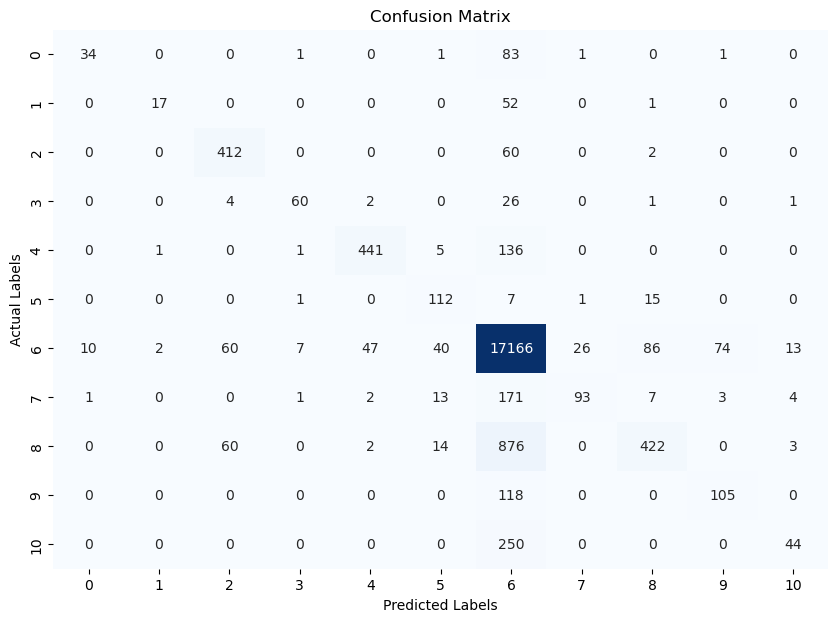

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(ANN_new_actual_labels, ANN_new_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


## **Prediction using FEW SHOT LEARNING**

In [77]:
# Load the class centroids
means_by_class = pd.read_csv('means_G_by_class.csv')

In [78]:
# Set 'label' column as the index
means_by_class.set_index('label', inplace=True)

In [79]:
def classify_word(sentence):
    words = simple_word_tokenize(sentence)
    
    features, word_ids = extract_features(words)
    
    data = []
    word_list = []
    seen_word_ids = set()
    
    # Map features to words and labels
    for i, word_id in enumerate(word_ids):
        if word_id is not None and word_id not in seen_word_ids:
            seen_word_ids.add(word_id)
            word_list.append(words[word_id])
            feature_vector = features[i].numpy()
            data.append([*feature_vector])

    # Create a DataFrame
    feature_df = pd.DataFrame(data)
    
    distances_df = pd.DataFrame()
    
    for label, centroid in means_by_class.iterrows():
        dist = []
        
        for _, feature in feature_df.iterrows():
            distance = np.linalg.norm(feature.values - centroid.values) 
            dist.append(distance)
        distances_df[label] = dist
    
    predictions = distances_df.idxmin(axis=1).astype(int)
    predicted_labels = label_encoder.inverse_transform(predictions)
    for word, label in zip(word_list, predicted_labels):
        print(f"Prediction for word '{word}' -----------> {label}")
    
    # Visualize feature vectors and centroids
    pca = PCA(n_components=2)
    feature_pca = pca.fit_transform(feature_df)
    centroid_pca = pca.transform(means_by_class)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(feature_pca[:, 0], feature_pca[:, 1], c='blue', label='Feature Vectors')
    plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], c='red', marker='x', label='Centroids')
    plt.legend()
    plt.title('Feature Vectors and Centroids Visualization')
    plt.show()

Prediction for word 'ثنائي' -----------> B-Chemical_Thing
Prediction for word 'أكسيد' -----------> I-Chemical_Thing
Prediction for word 'الكربون' -----------> I-Chemical_Thing
Prediction for word 'أو' -----------> B-Language
Prediction for word 'كما' -----------> OUTSIDE
Prediction for word 'يعرف' -----------> OUTSIDE
Prediction for word 'بالاسم' -----------> B-Language
Prediction for word 'الشائع' -----------> B-Language
Prediction for word 'ثاني' -----------> B-Chemical_Thing
Prediction for word 'أكسيد' -----------> I-Chemical_Thing
Prediction for word 'الكربون' -----------> I-Chemical_Thing
Prediction for word 'هو' -----------> B-Chemical_Thing
Prediction for word 'مركب' -----------> B-Chemical_Thing
Prediction for word 'كيميائي' -----------> B-Chemical_Thing
Prediction for word 'من' -----------> B-Chemical_Thing
Prediction for word 'الأكسجين' -----------> B-Chemical_Thing
Prediction for word 'الكربون' -----------> B-Chemical_Thing
Prediction for word 'له' -----------> I-Biological_

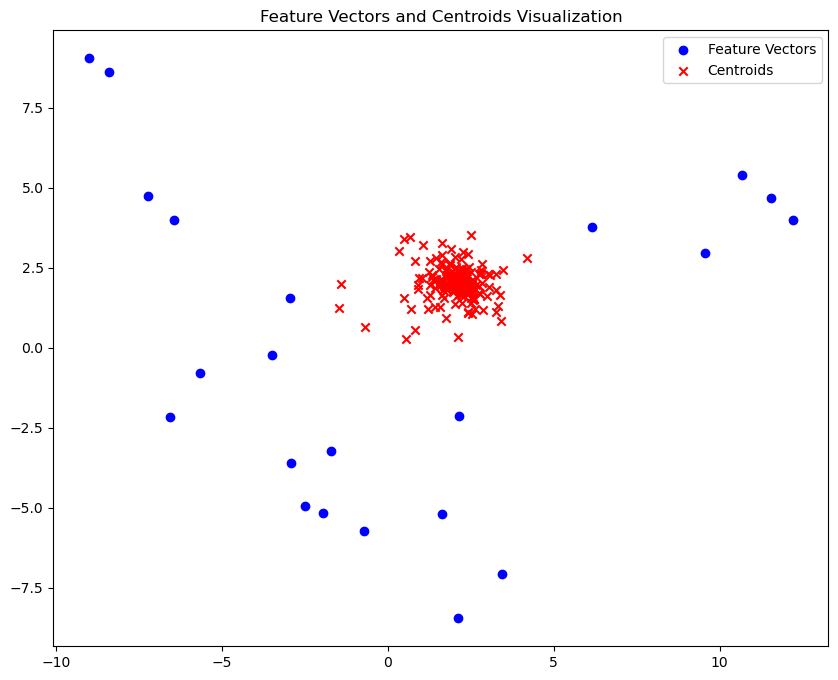

In [80]:
# مرحبا بك في عالم التعلم الآلي
Arabic_sentence = "ثنائي أكسيد الكربون أو كما يعرف بالاسم الشائع ثاني أكسيد الكربون هو مركب كيميائي من  الأكسجين الكربون له الصيغة الكيميائية 2."
classify_word(Arabic_sentence)

In [81]:
def classify_word(sentence):
    
    features, word_ids = extract_features(sentence)
    
    data = []
    word_list = []
    seen_word_ids = set()
    
    # Map features to words and labels
    for i, word_id in enumerate(word_ids):
        if word_id is not None and word_id not in seen_word_ids:
            seen_word_ids.add(word_id)
            word_list.append(sentence[word_id])
            feature_vector = features[i].numpy()
            data.append([*feature_vector])

    # Create a DataFrame
    feature_df = pd.DataFrame(data)
    
    distances_df = pd.DataFrame()
    
    for label, centroid in means_by_class.iterrows():
        dist = []
        
        for _, feature in feature_df.iterrows():
            distance = np.linalg.norm(feature.values - centroid.values) 
            dist.append(distance)
        distances_df[label] = dist
    
    predictions = distances_df.idxmin(axis=1).astype(int)
    predicted_labels = label_encoder.inverse_transform(predictions)

    return list(predicted_labels)

In [82]:
labelsPredictedArray = []
for i in range(0, len(sentences)):
    predicted_labels = classify_word(sentences[i])
    labelsPredictedArray.append(predicted_labels)
    if i % 100 == 0:
        print(round((i/len(sentences)) * 100, 2), "%")

print("100 %")

0.0 %
11.68 %
23.36 %
35.05 %
46.73 %
58.41 %
70.09 %
81.78 %
93.46 %
100 %


In [83]:
predicted_labels = []
for sublist in labelsPredictedArray:
    for labl in sublist:
        predicted_labels.append(labl)
# predicted_labels

In [84]:
# index = 1
# print(labels[index])
# print()
# print(labelsPredictedArray[index])

In [85]:
from sklearn.metrics import classification_report

print(classification_report(actual_labels, predicted_labels))

                           precision    recall  f1-score   support

                  B-Actor       0.00      0.00      0.00         2
                B-Airline       0.00      0.00      0.00         5
               B-Airplane       0.30      0.72      0.43        18
                B-Airport       0.67      1.00      0.80         4
              B-Algorithm       0.00      0.00      0.00         6
                 B-Animal       0.35      0.78      0.48       130
              B-Architect       0.00      0.00      0.00         2
                 B-Artist       0.05      0.14      0.07        14
                B-Athlete       0.00      0.00      0.00         0
                 B-Attack       0.06      0.43      0.10         7
                 B-Author       0.18      0.12      0.14        25
                  B-Award       0.39      0.88      0.55        17
       B-Biological_Thing       0.08      0.26      0.12        47
          B-Body_Of_Water       0.48      0.75      0.59     

In [86]:
FSL_new_actual_labels = trimLabels(actual_labels)
FSL_new_predicted_labels = trimLabels(predicted_labels)


In [87]:
print(classification_report(FSL_new_actual_labels, FSL_new_predicted_labels))

              precision    recall  f1-score   support

         Art       0.16      0.76      0.26       121
    Building       0.11      0.47      0.18        70
        Date       0.61      0.85      0.71       474
       Event       0.12      0.89      0.21        94
    Location       0.37      0.88      0.52       584
 Nationality       0.56      0.57      0.56       136
     OUTSIDE       0.99      0.64      0.78     17531
Organization       0.32      0.63      0.42       295
       Other       0.27      0.85      0.41      1377
      Person       0.36      0.89      0.51       223
     Product       0.35      0.80      0.48       294

    accuracy                           0.67     21199
   macro avg       0.38      0.75      0.46     21199
weighted avg       0.88      0.67      0.72     21199



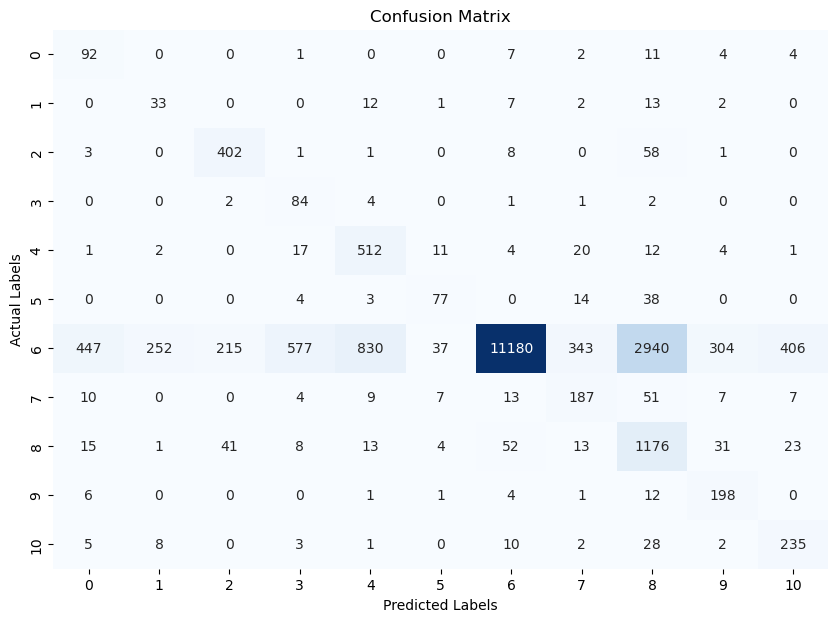

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(FSL_new_actual_labels, FSL_new_predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()
